## Linear Regression Assignment

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To display all the columns
pd.set_option('display.max_columns', None)

In [2]:
# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import MinMaxScaler

# Importing STATS MODEL
import statsmodels.api as sm

# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the CarPrice data

In [4]:
#Importing CarPrice_Assignment.csv
car_data = pd.read_csv('CarPrice_Assignment.csv')
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


### Normal check (Shape, Head, Tail, Summary) of given data

In [5]:
#checking Shape of the data
car_data.shape

(205, 26)

In [6]:
#checking head of the data
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#checking tail of the data
car_data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [8]:
#Summary of given CarPrice data set 
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#Inforamation of data
car_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [10]:
# Dropping Duplicates if present
car_data = car_data.drop_duplicates()

In [11]:
#Dropping car_ID column since it is not relevent because its unique ID and it does not reprsent anything
car_data.drop('car_ID',axis=1,inplace=True)

### Checking Count of Missing Values

In [12]:
# Number of missing
car_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### From above missing values count we can see that in our CarPrice data set there are no missing values present in any column

### Analysis Part
#### Data Understanding and Correction

#### 1. Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

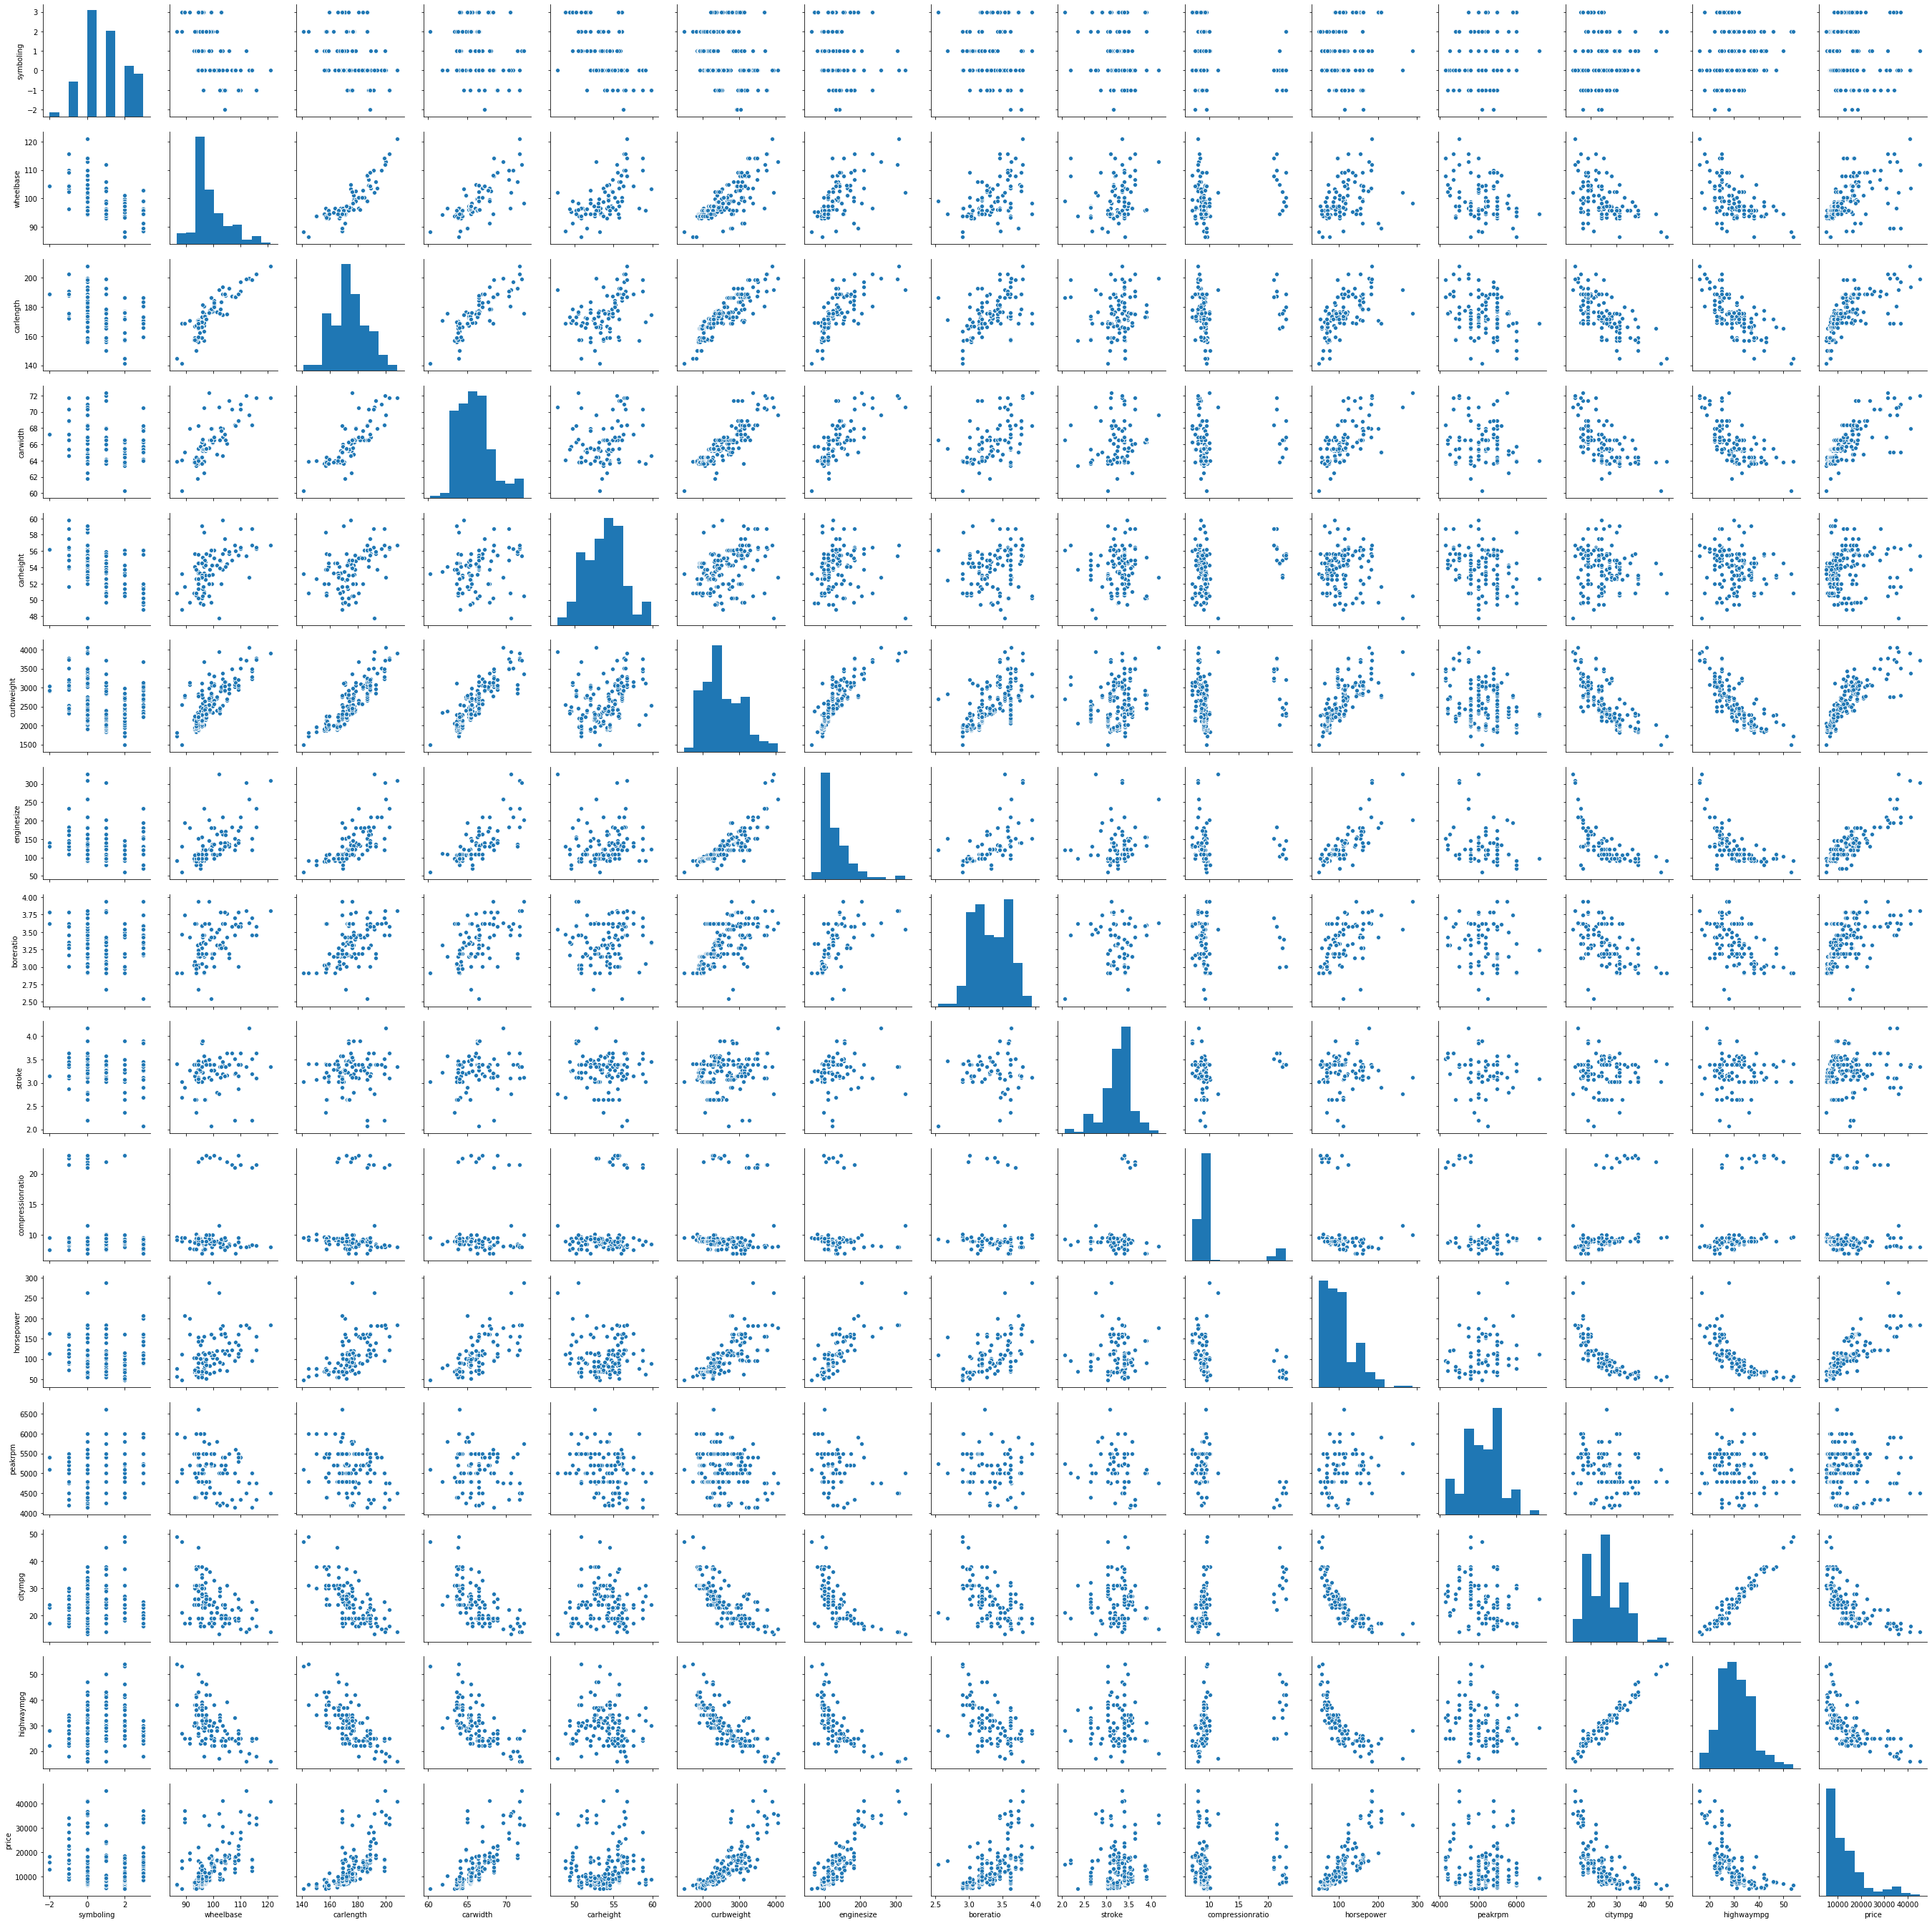

In [13]:
#Visualising the Data using pair plot 
sns.pairplot(car_data)
plt.show()

#### 2. Visualisation of correlation through Heat-map
Lets see the correlation plot among the numeric variables showing how strongly they are related

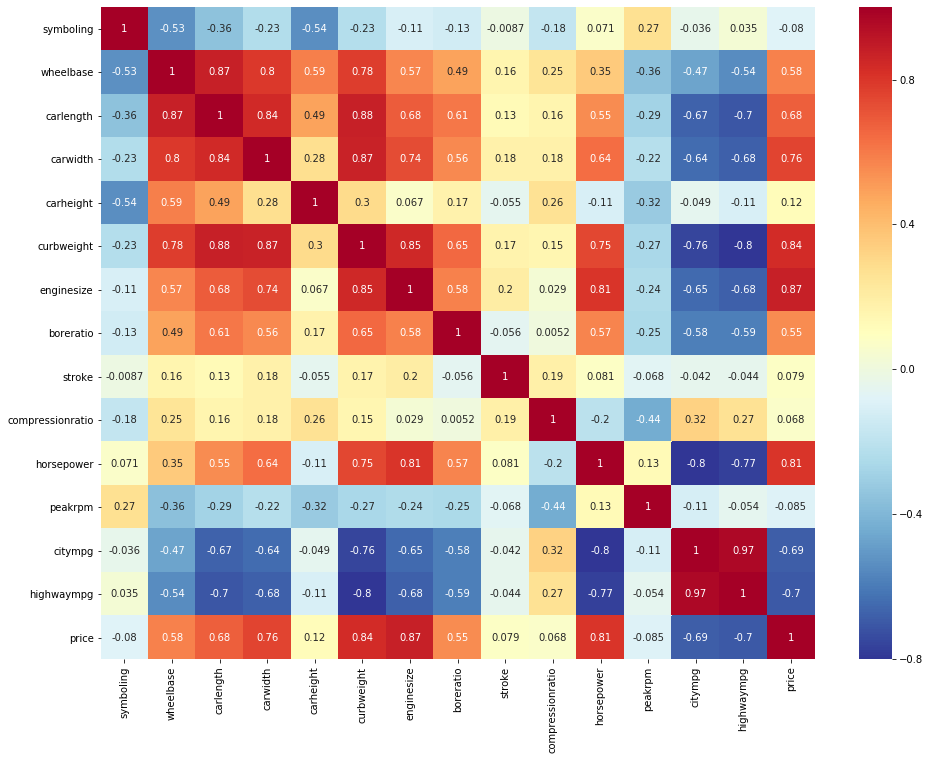

In [14]:
#Visualisation of correlation through Heat-map 
plt.figure(figsize = (16, 12))
car_data_corr_mat = car_data.corr()
sns.heatmap(car_data_corr_mat, cmap = plt.cm.RdYlBu_r, annot =True)
plt.show()

#### From above heat map we can conclude:
From this we can notice how all features related are to price. We found some features has positive relationship with the price variable and few variables showing a negative relationship with price variable. 

Features Which are Positively correlated with Price :

    1. enginesize (0.87)
    2. curbweight (0.84)
    3. horsepower (0.81)
    4. carwidth (0.76)
    5. carlength (0.68)
    6. wheelbase (0.58) 
    7. boreratio (0.55)

Featrures which are Negatively correlated Price:

    1. highwaympg (-0.7)
    2. citympg (-0.69)

Also, we can notice there is some obvious multicollinearity present in between predictor variables,

enginesize is Strong and Positively correlated with horsepower, crubweight, carlength, carwidth
curbweight is Strong and Positively correlated with enginesize, carlength, carwidth, wheelbase
carlength is Strong and Positively correlated with wheelbase, carwidth, curbweight


highway and city mpg's are very highly correlated with a pearson r cofficieant of 0.97. We can drop anyone of these.

We can also notice some negative correlation between the varaibles,
crubweight,horsepower with the higway/city mpg's

### Handling Categorical Variables
##### 1. Symboling Variable    
- From the categorical variables present in the data we can notice Symboling variable column as been treeted as a numeric int64 type variable. So we have to covert this varibale. In Symboling variable it is assigned insurance risk rating,A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. Let's make it clear by classifying based on risk.

- Negative symboling as safe
- 0, 1 as tolerable
- 2,3 as risky

In [15]:
car_data['symboling'] = car_data['symboling'].map({-2: 'safe',-1: 'safe',0: 'tolerable',1: 'tolerable',2: 'risky',3:'risky'})
car_data.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,risky,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,risky,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,tolerable,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,risky,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,risky,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,risky,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,tolerable,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,tolerable,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,tolerable,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,tolerable,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


##### 2. CarName Variable    
As per the Business problem CarName varible is comprised of two parts - the 1st word is the name of company and the 2nd one is the name of th car model. For example, alfa-romero has 'alfa-romero' as the car company name and 'giulia' as the car model name. While Model building we required only company name as the independent variable so we splitted CarName varible into two parts and consider only Name of the car company for data understanding. For which we have to create one new varible as 'CarCompany' consisting only Name of the car company.


In [16]:
car_data['CarCompany'] = car_data['CarName'].apply(lambda x: x.split( )[0])
car_data.drop('CarName', axis=1, inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,tolerable,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
# checking for unique companies names
car_data['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Fixing invalid values
Here, we can notice that there are xome spelling error in the CarCompany column multiple companies name being misspelled. we'll have to fix it.

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [18]:
# Correcting the spelling of company names.
car_data['CarCompany'].replace('maxda','mazda',inplace=True)
car_data['CarCompany'].replace('Nissan','nissan',inplace=True)
car_data['CarCompany'].replace('porcshce','porsche',inplace=True)
car_data['CarCompany'].replace('toyouta','toyota',inplace=True)
car_data['CarCompany'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,tolerable,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [19]:
#Now lets look into the unique values in 'CarCompany' again-
car_data['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
#Function for plotting graphs 
#Function to show labels in bar plots
def showLabels(ax, d=None):
    plt.margins(0.5, 0.5)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [21]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(30, 25))
    for var in var_list:
        plt.subplot(4,3,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('husl'))
        ax.set_ylabel('% in dataset', fontsize=20)
        ax.set_xlabel(var, fontsize=20)
        plt.xticks(rotation = 0)
        plt.tick_params(axis='both', which='major', labelsize=17)
        showLabels(ax)

In [22]:
def plot_cat(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(15, 20))
    for var in var_list:
        plt.subplot(5,2,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car_data)
        plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

In [23]:
from scipy.stats import norm
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(30, 20))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        sns.distplot(car_data[var], fit=norm, kde=False)
    plt.show()

In [24]:
categorical_vars = list(car_data.columns[car_data.dtypes == 'object'])
categorical_vars

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompany']

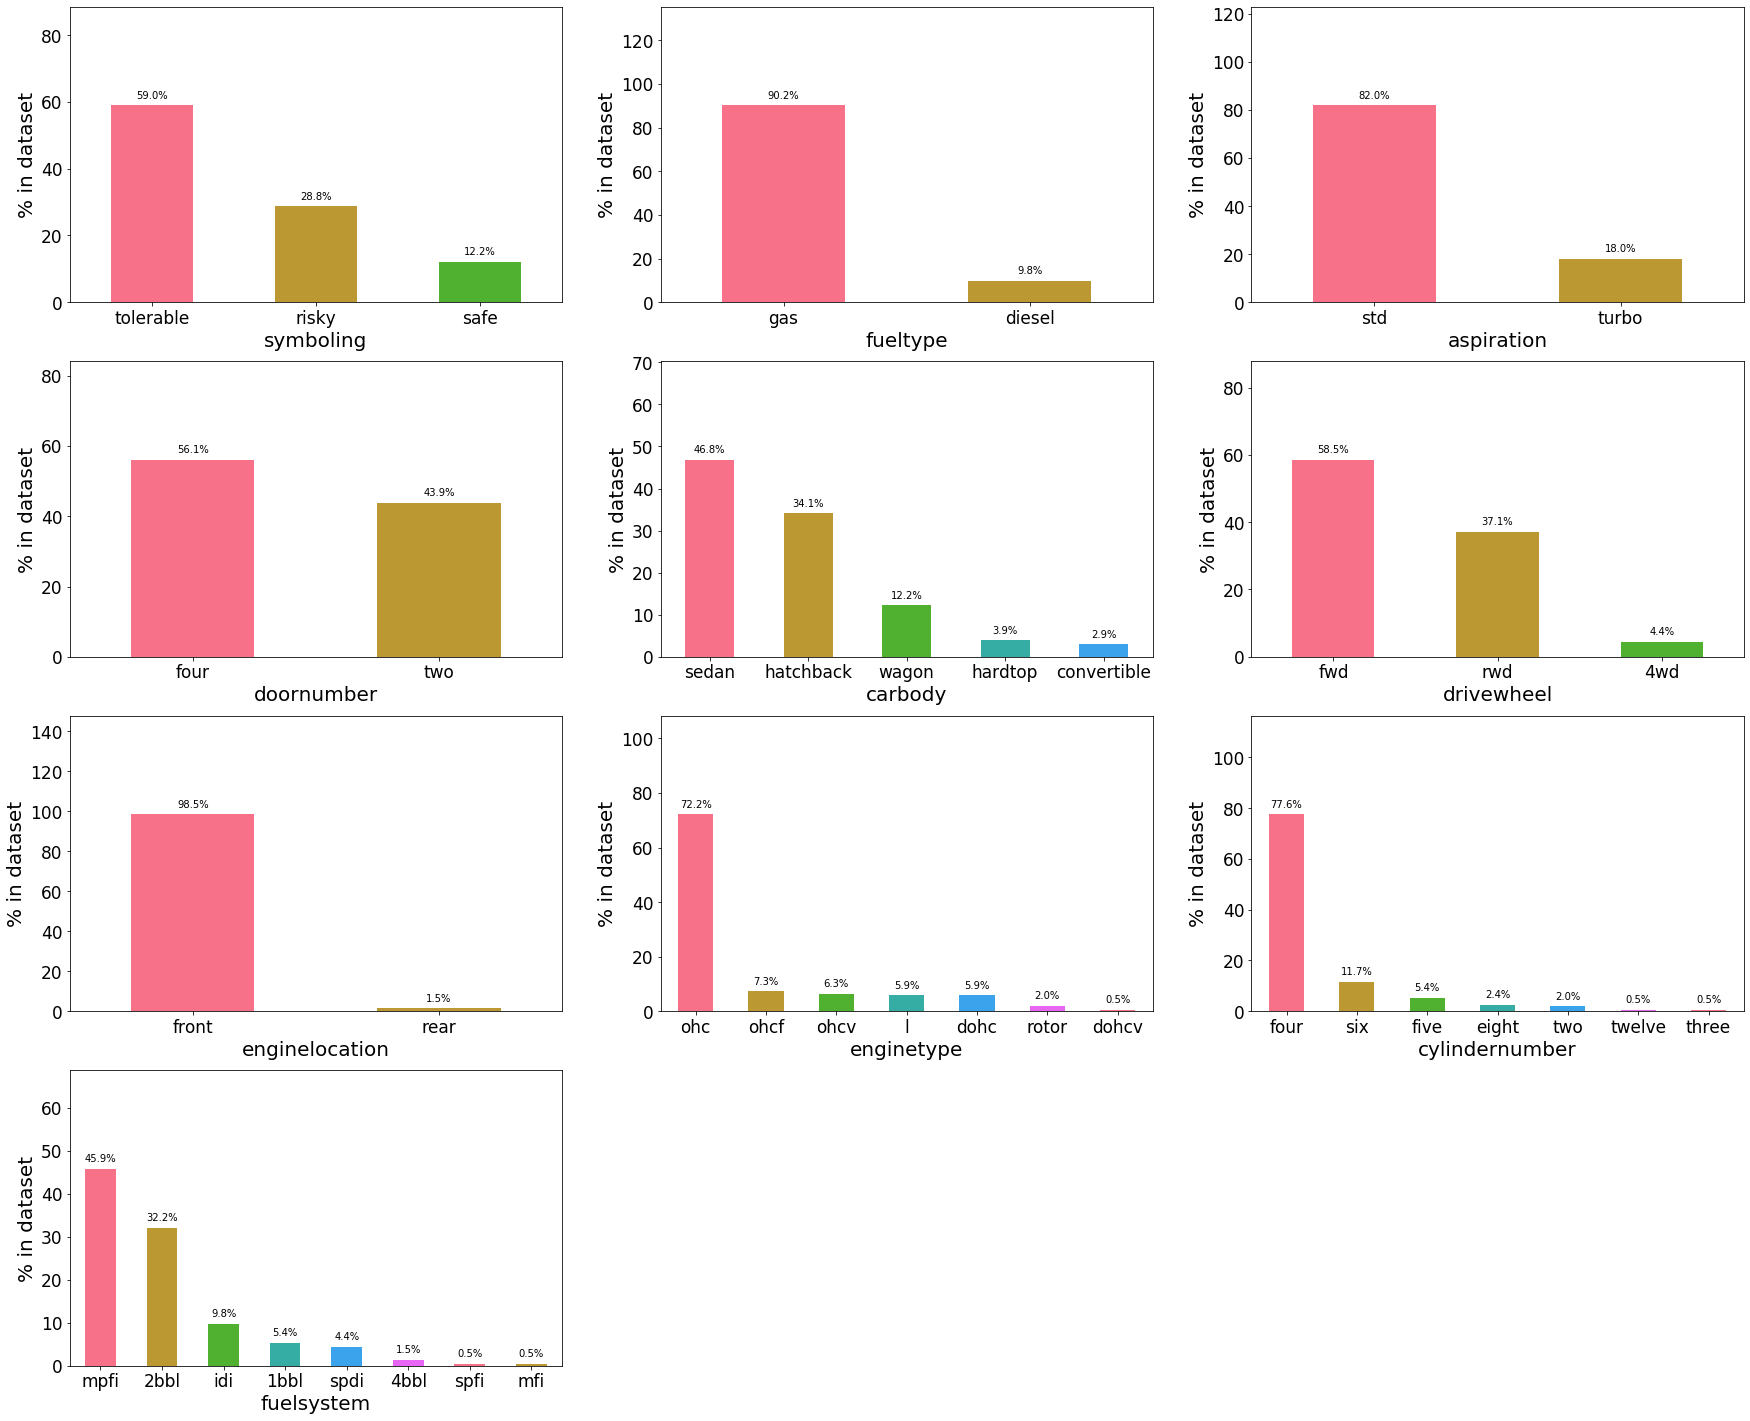

In [25]:
# market percentage of car's with respect to features
plot_percentages(car_data,categorical_vars[:-1])

#### From above Bar Graphs of percentage of cars with respect to features we can conclude:
We can notice that some of the car features that are very demanding in the US Automobile Market, Geely Automotives can consider these important aspects to being competitive in the market by aquiring these requirements and accrodingly make the necessary changes to their manufacturing line. These are:

- symboling: In Symboling the Tolerable Symbol (0,1) has the highest number of car percent in the US market.
- Carbody: Sedan type Carbody is most popular in the US market.
- fueltype: gas has been widely used as fuel in the US market.
- aspiration: standard is mostly preferred type.
- doornumbers: Car with four door options are the choice of more than 56% customers.
- drivewheel: forward drivewheel type are mostly preferred.
- engine location: Engine located at front is most popular with nore the 98% share in the market.
- engine type: ohc type engine is wide used.
- cylinderNumber: Car with four cylinder options are the choice of more than 77% customers.
- fuelSystem: mpfi is the popular one.

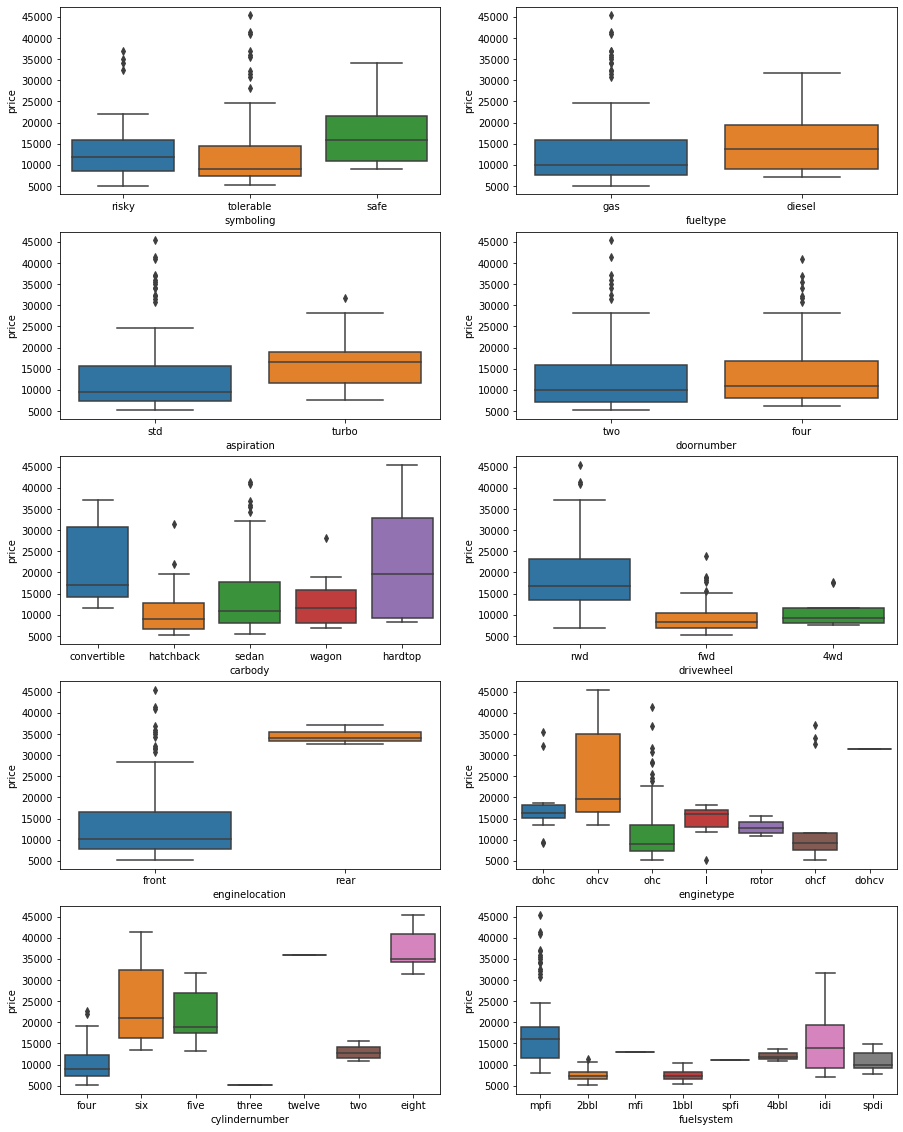

In [26]:
# ploting all variables excluding CarCompany against the output variable
plot_cat(categorical_vars[:-1])

#### From above Boxplots we can observate Following:

- We can notice The price of real wheel drive is Very high as compared to other options.
- We can notice fuel type seems to have marginal effect on the pricing of the cars. 
- location of Engine and aspiration definitely has a visible affect on pricing.
- From observation it seems like number of cylinder and type of engine also regulating the pricing.
- Car body type hardtop and convertables are higher in price than other types available. So variable carbody is definitely contributing towards determination of the price.

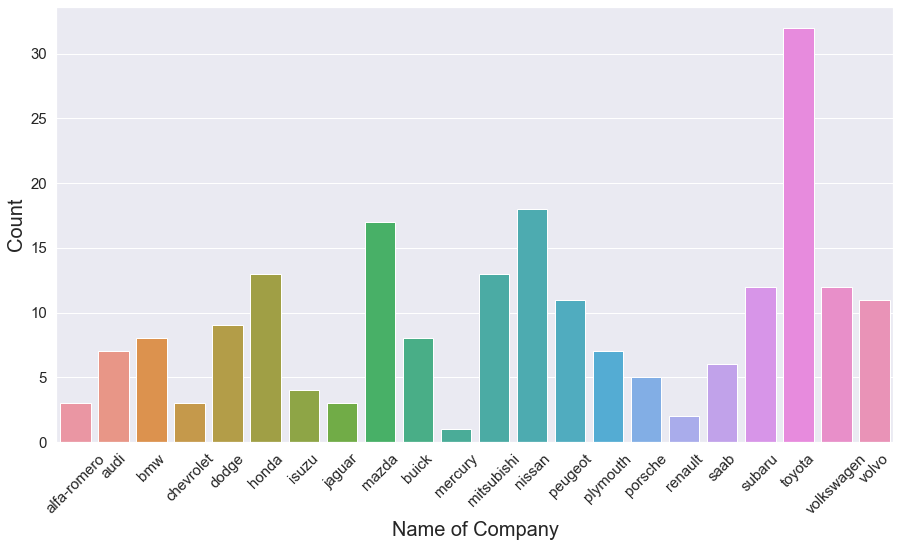

In [27]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="CarCompany", data=car_data)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Name of Company', fontsize=20 )
plt.xticks(rotation = 45)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

#### Inference :
- Toyota seemed to be most favored car company in the US market.
- Which is followed by Nissan & Mazda.
- Mitsubishi and Honda are seems to be equally popular in market.


#### Variation of prices according to different automobie companies in the US market

<Figure size 2520x1800 with 0 Axes>

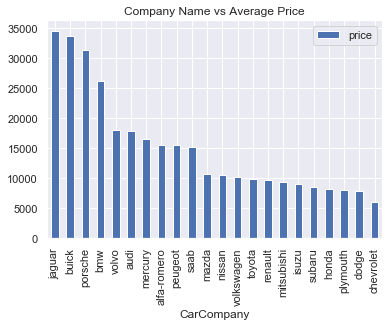

Average US car price:  13276.710570731706
CarCompany
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [28]:

plt.figure(figsize=(35,25))
df = pd.DataFrame(car_data.groupby(['CarCompany'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

# Lets have a look at range distributions for car price
print('Average US car price: ',car_data['price'].mean())
print(car_data.groupby('CarCompany').price.mean().sort_values(ascending=False).head())

#### Inference :
- Jaguar Buick and Porsche seems to have highest average price.
- Chevrolet and dodge have lowest average price.

In [29]:
cars_df_category = car_data.groupby(['CarCompany']).median()
cars_df_category['price']

CarCompany
alfa-romero    16500.0
audi           17710.0
bmw            22835.0
buick          32892.0
chevrolet       6295.0
dodge           7609.0
honda           7295.0
isuzu           8916.5
jaguar         35550.0
mazda          10595.0
mercury        16503.0
mitsubishi      8499.0
nissan          8124.0
peugeot        16630.0
plymouth        7609.0
porsche        32528.0
renault         9595.0
saab           15275.0
subaru          7894.0
toyota          9103.0
volkswagen      9737.5
volvo          18420.0
Name: price, dtype: float64

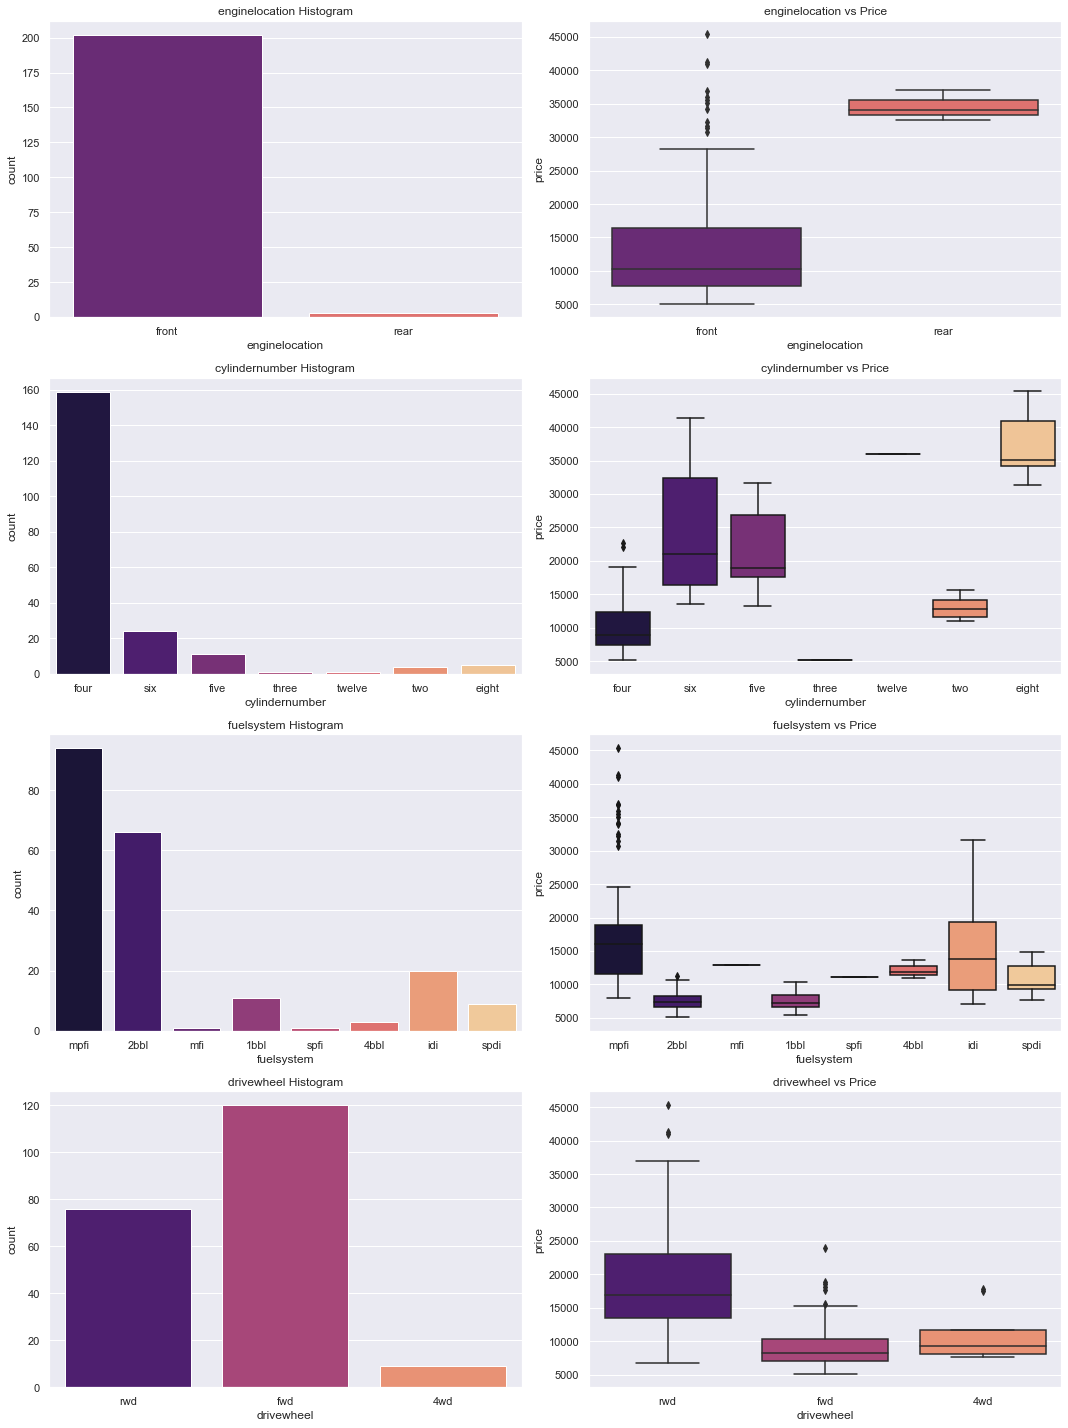

In [30]:
def plot_count(x,fig):    
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(car_data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=car_data[x], y=car_data.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

#### Conclusions :
- Very few datapoints for enginelocation categories to make an inference.
- Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
- mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
- A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

### Outlier treatment
First we will Count Number of Outliers in every column of our Car_data and then calculate percentage of Outliers in each column according to which we will perform outliers treatment

In [31]:
# IQR values for all the columns
Q1 = car_data.quantile(0.25)
Q3 = car_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

wheelbase              7.90
carlength             16.80
carwidth               2.80
carheight              3.50
curbweight           790.00
enginesize            44.00
boreratio              0.43
stroke                 0.30
compressionratio       0.80
horsepower            46.00
peakrpm              700.00
citympg               11.00
highwaympg             9.00
price               8715.00
dtype: float64


In [32]:
# Count of Outliers
Outliers_count = ((car_data < (Q1 - 1.5 * IQR)) | (car_data > (Q3 + 1.5 * IQR))).sum()
Outliers_count

CarCompany           0
aspiration           0
boreratio            0
carbody              0
carheight            0
carlength            1
carwidth             8
citympg              2
compressionratio    28
curbweight           0
cylindernumber       0
doornumber           0
drivewheel           0
enginelocation       0
enginesize          10
enginetype           0
fuelsystem           0
fueltype             0
highwaympg           3
horsepower           6
peakrpm              2
price               15
stroke              20
symboling            0
wheelbase            3
dtype: int64

We can notice compression ratio, enginesize, stroke, carwidth and horsepower variables having significant outliers.
Since its a small data so we decide not treat outliers.


In [33]:
# Rearranging the columns list in the dataframe to have the new column 'Company Name' appear first
cols = car_data.columns.tolist()
cols = cols[-1:] + cols[:-1]

# Assigning the re-arranged column to our 'car_data'
car_data = car_data[cols]
car_data.head()

,CarCompany,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,tolerable,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Handling categorical variables for linear regression


#### 1. Lets see the unique values associated with the below categorical variables -
    - fueltype
    - aspiration
    - doornumber
    - carbody
    - drivewheel
    - enginelocation
    - enginetype
    - cylindernumber
    - fuelsystem

This will aslo give us the idea for mapping the categorical values to 0, 1.

In [34]:
# unique values for fueltype
print("Unique values in fueltype: ", car_data['fueltype'].unique())

print('\n')

# unique values for aspiration
print("Unique values in aspiration: ", car_data['aspiration'].unique())

print('\n')

# unique values for doornumber
print("Unique values in doornumber: ", car_data['doornumber'].unique())

print('\n')

# unique values for carbody
print("Unique values in carbody: ", car_data['carbody'].unique())

print('\n')

# unique values for drivewheel
print("Unique values in drivewheel: ", car_data['drivewheel'].unique())

print('\n')

# unique values for enginelocation
print("Unique values in enginelocation: ", car_data['enginelocation'].unique())

print('\n')

# unique values for enginetype
print("Unique values in enginetype: ", car_data['enginetype'].unique())

print('\n')

# unique values for cylindernumber
print("Unique values in cylindernumber: ", car_data['cylindernumber'].unique())

print('\n')

# unique values for fuelsystem
print("Unique values in fuelsystem: ", car_data['fuelsystem'].unique())


Unique values in fueltype:  ['gas' 'diesel']


Unique values in aspiration:  ['std' 'turbo']


Unique values in doornumber:  ['two' 'four']


Unique values in carbody:  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Unique values in drivewheel:  ['rwd' 'fwd' '4wd']


Unique values in enginelocation:  ['front' 'rear']


Unique values in enginetype:  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


Unique values in cylindernumber:  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


Unique values in fuelsystem:  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


As we see from the output above variables -

    - fueltype, aspiration, doornumber, enginelocation:  2 levels
    - drivewheel:  3 levels
    - carbody:  5 levels
    - enginetype, cylindernumber:  7 levels
    - fuelsystem:  8 levels

Lets first consider assigning dummy variables for categorical variables with 2 and 3 levels respectively.

#### 2. Converting all categorical fields of two levels to binary

In [35]:
#  We will map the variable with 2 levels to binary encodings of 0 & 1
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})
car_data['doornumber'] = car_data['doornumber'].map({'two': 1, 'four': 0})
car_data['enginelocation'] = car_data['enginelocation'].map({'front': 1, 'rear': 0})
car_data.head()

,CarCompany,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,tolerable,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 3. Creating new variables to Reducing Multicolinearity
Form the correlation heatmap, we observe the following -

1. carlength is highly correlated with carwidth. (corr = 0.84)
2. carlength is highly correlated with wheelbase. (corr = 0.87)
3. carwidth is highly correlated with crubweight. (corr = 0.87)
4. crubweight is highly correlated with horsepower. (corr = 0.75)
5. horsepower is highly correlated with enginesize. (corr = 0.81)
6. highwaympg is highly correlated with citympg. (corr = 0.97)

We have to reduce multicolinearity among the variables to get an accurate model. We can safely drop some of these columns leaving the columns that is strongly correlated to 'price'. We will be dropping columns ['carlength','carwidth','carheight','highwaympg','citympg']. Instead we'll create some new variables.

The reason for dropping 'highwaympg', 'citympg' is that they both are very highly correlated to each other but have a very low correlation with price.

We will keep the other variables for time being as they show a very strong correlation with price

In [36]:
# Creating new variable L-W_ratio
car_data['LW_ratio'] = car_data.carlength/car_data.carwidth

# Creating new variable W-H_ratio
car_data['WH_ratio'] = car_data.carwidth/car_data.carheight

# Creating new variable P-W_ratio
car_data['PW_ratio'] = car_data.horsepower/car_data.curbweight

# Creating new variable H-C_mpg_ratio
car_data['HC_mpg_ratio'] = car_data.highwaympg/car_data.citympg

# droping the orignal variables
car_data.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

4. Earlier we noticed that the company brand value also determinig the pricing of the car. So we'll create a company_segment categorical variable which would suggest, under which segment tier does the car_company comes under. We will segment the car companies based on the mean company price as

    - EconomicCars if company mean price is below 10,000
    - MidtierCars if company mean price is above 10,000 and below 20,000
    - LuxuryCars if company mean price is above 20,000

In [37]:
# Lets have a look at certain range distributions for car price

car_data.price.describe([.40, .80])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
40%       9036.600000
50%      10295.000000
80%      17493.800000
max      45400.000000
Name: price, dtype: float64

In [38]:
car_data.groupby('CarCompany').price.mean().sort_values(ascending=False)

CarCompany
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [39]:
company_segment_dict = {'cheverolet' : 'EconomicCars', 
    'dodge' : 'EconomicCars', 'plymouth' : 'EconomicCars', 'honda' : 'EconomicCars', 'subaru' : 'EconomicCars', 
    'isuzu' : 'EconomicCars', 'mitsubishi' : 'EconomicCars', 'renault' : 'EconomicCars', 'toyota' : 'EconomicCars', 
    'volkswagen' : 'MidtierCars', 'nissan' : 'MidtierCars', 'mazda' : 'MidtierCars', 'saab' : 'MidtierCars',
    'peugeot' : 'MidtierCars', 'alfa-romero' : 'MidtierCars', 'mercury' : 'MidtierCars', 'audi' : 'MidtierCars',
    'volvo' : 'MidtierCars',
    'bmw' : 'LuxuryCars', 'buick' : 'LuxuryCars', 'porsche' : 'LuxuryCars', 'jaguar' : 'LuxuryCars',
    }

car_data['CompanySegment'] = car_data['CarCompany'].map(company_segment_dict)
# Dropping the orignal car_company variable
car_data.drop('CarCompany',axis=1,inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,LW_ratio,WH_ratio,PW_ratio,HC_mpg_ratio,CompanySegment
0,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,MidtierCars
1,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,MidtierCars
2,tolerable,1,1,1,hatchback,rwd,1,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,MidtierCars
3,risky,1,1,0,sedan,fwd,1,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,MidtierCars
4,risky,1,1,0,sedan,4wd,1,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,MidtierCars


In [40]:
car_data.groupby('CompanySegment').price.mean()

CompanySegment
EconomicCars     8987.369565
LuxuryCars      30788.687500
MidtierCars     13231.839151
Name: price, dtype: float64

In [41]:
# Creating dummy variables
data = pd.get_dummies(car_data)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
data.drop(['symboling_risky', 'carbody_hatchback', 'drivewheel_4wd', 'enginetype_l', 'cylindernumber_three',
         'fuelsystem_1bbl', 'CompanySegment_EconomicCars'],axis=1,inplace=True)
data.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'LW_ratio', 'WH_ratio', 'PW_ratio',
       'HC_mpg_ratio', 'symboling_safe', 'symboling_tolerable',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CompanySegment_LuxuryCars', 'CompanySegment_MidtierCars'],
      dtype='object')

## Building the linear model

### Splitting the data into Train and Test sets

In [42]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# We will divide the data into 70/30 % to train and test data respectively.
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature scaling

In [43]:
#  Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# 'horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','LW_ratio','WH_ratio',
# 'PW_ratio','HC_mpg_ratio','stroke','compressionratio','peakrpm','price'

scaler = MinMaxScaler()

num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','LW_ratio','WH_ratio',
            'PW_ratio','HC_mpg_ratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,LW_ratio,WH_ratio,PW_ratio,HC_mpg_ratio,symboling_safe,symboling_tolerable,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanySegment_LuxuryCars,CompanySegment_MidtierCars
122,1,1,0,1,0.244828,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.068818,0.557140,0.448461,0.169146,0.348974,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
125,1,1,1,1,0.272414,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.466890,0.325594,0.709540,0.480607,0.650718,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
166,1,1,1,1,0.272414,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.122110,0.578350,0.350729,0.438242,0.178322,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,0.068966,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.314446,0.574393,0.592205,0.360040,0.441558,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
199,1,0,0,1,0.610345,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.382131,0.847483,0.230896,0.478148,0.454545,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [45]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,LW_ratio,WH_ratio,PW_ratio,HC_mpg_ratio,symboling_safe,symboling_tolerable,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanySegment_LuxuryCars,CompanySegment_MidtierCars
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.219310,0.571441,0.387705,0.301305,0.355073,0.104895,0.650350,0.027972,0.020979,0.475524,0.132867,0.594406,0.349650,0.069930,0.006993,0.685315,0.083916,0.062937,0.027972,0.020979,0.062937,0.741259,0.132867,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.118881,0.412587
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.215682,0.194278,0.153936,0.139794,0.139367,0.307495,0.478536,0.165472,0.143818,0.501156,0.340624,0.492733,0.478536,0.255926,0.083624,0.466023,0.278236,0.243703,0.165472,0.143818,0.243703,0.439483,0.340624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.324786,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.067298,0.474597,0.291396,0.218294,0.275974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.140343,0.578350,0.365962,0.268725,0.348974,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.313479,0.701553,0.460845,0.360401,0.412121,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [46]:
df_train.shape

(143, 46)

In [47]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('price')
X_train = df_train

### RFE
#### Recursive feature elimination

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE and selecting 15 features best describing the price of cars
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 9),
 ('doornumber', False, 28),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 15),
 ('horsepower', True, 1),
 ('peakrpm', False, 6),
 ('LW_ratio', False, 13),
 ('WH_ratio', True, 1),
 ('PW_ratio', True, 1),
 ('HC_mpg_ratio', False, 20),
 ('symboling_safe', False, 16),
 ('symboling_tolerable', False, 26),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 27),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 25),
 ('drivewheel_fwd', False, 22),
 ('drivewheel_rwd', False, 29),
 ('enginetype_dohc', False, 12),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 23),
 ('enginetype_rotor', False, 24),
 ('cylindernumber_eight', False, 4),
 ('cylindernumber_five', False, 3),
 ('cylindernumber_four', True, 1),
 ('cylindern

In [50]:
#Lets see the columns that RFE supports - 
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'wheelbase', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'WH_ratio', 'PW_ratio',
       'carbody_convertible', 'enginetype_dohcv', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve',
       'CompanySegment_LuxuryCars'],
      dtype='object')

In [51]:
# Lets see the variables the are rejected by RFE - 
X_train.columns[~rfe.support_]

Index(['aspiration', 'doornumber', 'stroke', 'compressionratio', 'peakrpm',
       'LW_ratio', 'HC_mpg_ratio', 'symboling_safe', 'symboling_tolerable',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CompanySegment_MidtierCars'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model 1
We will build our first model using the variables that rfe supported above.

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

#### Custom Function Definations For model fitting
1. applyStatsModel   -     Applies the StatsModel to the given data.
    - Purpose     :    Applies stats model to the given data & returns the built 'linear_model'.
    - Parameters  :    data - the dataset on which the linear model has to be built on.
    - Returns     :    linear_model - the model that has been built on the data provided. 

In [53]:
def applyStatsModel(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    # Run the linear model
    lm = sm.OLS(y_train,X_train).fit() 
    return lm

2. calculateVIF      -     Calculates the VIF for a given model.
    - Purpose     :    Calculates the Variance inflation factor for the given data on which stats model has been applied.
    - Parameters  :    data - the dataset for which the VIF values have to be calculated.
    - Returns     :    vif - the vif values for the variables on the model's data.

In [54]:
def calculateVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [55]:
# Run the linear model
stats_model_1 = applyStatsModel(X_train_1)

#Let's see the summary of the linear model built above
print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.68e-70
Time:                        07:31:39   Log-Likelihood:                 219.73
No. Observations:                 143   AIC:                            -407.5
Df Residuals:                     127   BIC:                            -360.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- boreratio has a p-value(0.439) > 0.05. Meaning this variable is not having enough impact. 
- boreratio has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model-2

In [56]:
X_train_2 = X_train_1.drop(["boreratio"], axis = 1)

# Run the linear model
stats_model_2 = applyStatsModel(X_train_2)

#Let's see the summary of the new linear model
print(stats_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     146.0
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.84e-71
Time:                        07:31:39   Log-Likelihood:                 219.39
No. Observations:                 143   AIC:                            -408.8
Df Residuals:                     128   BIC:                            -364.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- enginesize  has a p-value(0.163) > 0.05. Meaning this variable is not having enough impact. 
- enginesize  has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model-3

In [57]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Run the linear model
stats_model_3 = applyStatsModel(X_train_3)

#Let's see the summary of the new linear model
print(stats_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     155.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           3.82e-72
Time:                        07:31:39   Log-Likelihood:                 218.30
No. Observations:                 143   AIC:                            -408.6
Df Residuals:                     129   BIC:                            -367.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- WH_ratio has a p-value(0.125) > 0.05. Meaning this variable is not having enough impact. 
- WH_ratio has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model-4

In [58]:
X_train_4 = X_train_3.drop(["WH_ratio"], axis = 1)

# Run the linear model
stats_model_4 = applyStatsModel(X_train_4)

#Let's see the summary of the new linear model
print(stats_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     166.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           9.37e-73
Time:                        07:31:39   Log-Likelihood:                 216.98
No. Observations:                 143   AIC:                            -408.0
Df Residuals:                     130   BIC:                            -369.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [59]:
# Calculate the VIFs again for the new model
vif_val_4 = calculateVIF(X_train_4)

# Let's see the vif values
vif_val_4

,Features,VIF
4,horsepower,299.15
5,PW_ratio,194.72
3,curbweight,166.35
1,enginelocation,96.02
2,wheelbase,25.74
0,fueltype,18.09
8,cylindernumber_four,9.34
9,cylindernumber_six,2.66
7,enginetype_dohcv,2.33
10,cylindernumber_twelve,2.09


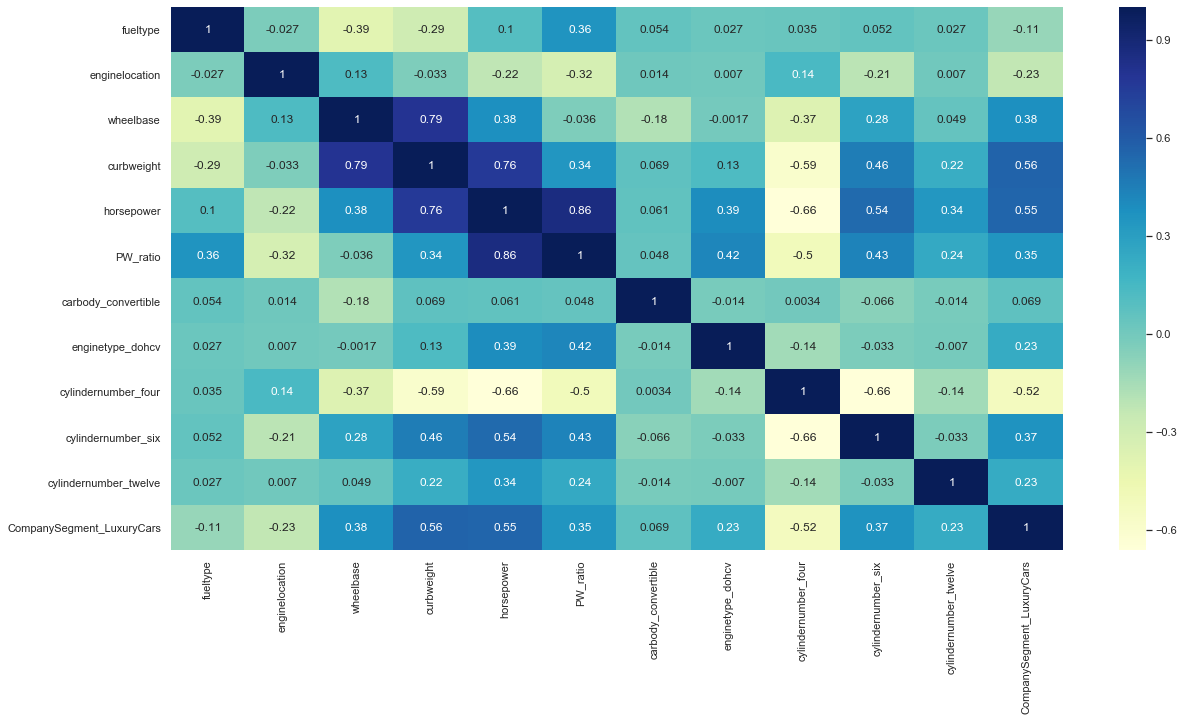

In [60]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_4.corr(),cmap= "YlGnBu" ,annot = True)

- horsepower is having the highest VIF and is strongly corelated with PW_ratio, curbweight. Let's remove this

#### Model-5

In [61]:
X_train_5 = X_train_4.drop(["horsepower"], axis = 1)

# Run the linear model
stats_model_5 = applyStatsModel(X_train_5)

#Let's see the summary of the new linear model
print(stats_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     150.8
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.02e-68
Time:                        07:31:42   Log-Likelihood:                 203.90
No. Observations:                 143   AIC:                            -383.8
Df Residuals:                     131   BIC:                            -348.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- cylindernumber_twelve has a p-value(0.691) > 0.05. Meaning this variable is not having enough impact. 
- cylindernumber_twelve has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model-6

In [62]:
X_train_6 = X_train_5.drop(["cylindernumber_twelve"], axis = 1)

# Run the linear model
stats_model_6 = applyStatsModel(X_train_6)

#Let's see the summary of the new linear model
print(stats_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     166.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           8.35e-70
Time:                        07:31:42   Log-Likelihood:                 203.81
No. Observations:                 143   AIC:                            -385.6
Df Residuals:                     132   BIC:                            -353.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- cylindernumber_six has a p-value(0.320) > 0.05. Meaning this variable is not having enough impact. 
- cylindernumber_six has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model-7

In [63]:
X_train_7 = X_train_6.drop(["cylindernumber_six"], axis = 1)

# Run the linear model
stats_model_7 = applyStatsModel(X_train_7)

#Let's see the summary of the new linear model
print(stats_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           9.75e-71
Time:                        07:31:42   Log-Likelihood:                 203.27
No. Observations:                 143   AIC:                            -386.5
Df Residuals:                     133   BIC:                            -356.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- enginetype_dohcv has a p-value(0.303) > 0.05. Meaning this variable is not having enough impact. 
- enginetype_dohcv has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model-8

In [64]:
X_train_8 = X_train_7.drop(["enginetype_dohcv"], axis = 1)

# Run the linear model
stats_model_8 = applyStatsModel(X_train_8)

#Let's see the summary of the new linear model
print(stats_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     208.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.11e-71
Time:                        07:31:42   Log-Likelihood:                 202.70
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     134   BIC:                            -360.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- fueltype has a p-value(0.105) > 0.05. Meaning this variable is not having enough impact.
- fueltype has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model-9

In [65]:
X_train_9 = X_train_8.drop(["fueltype"], axis = 1)

# Run the linear model
stats_model_9 = applyStatsModel(X_train_9)

#Let's see the summary of the new linear model
print(stats_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     234.8
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           2.58e-72
Time:                        07:31:42   Log-Likelihood:                 201.30
No. Observations:                 143   AIC:                            -386.6
Df Residuals:                     135   BIC:                            -362.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [66]:
# Calculate the VIFs again for the new model
vif_val_9 = calculateVIF(X_train_9)

# Let's see the vif values
vif_val_9

,Features,VIF
2,curbweight,28.45
0,enginelocation,26.17
1,wheelbase,24.29
3,PW_ratio,9.09
5,cylindernumber_four,6.71
6,CompanySegment_LuxuryCars,1.85
4,carbody_convertible,1.31


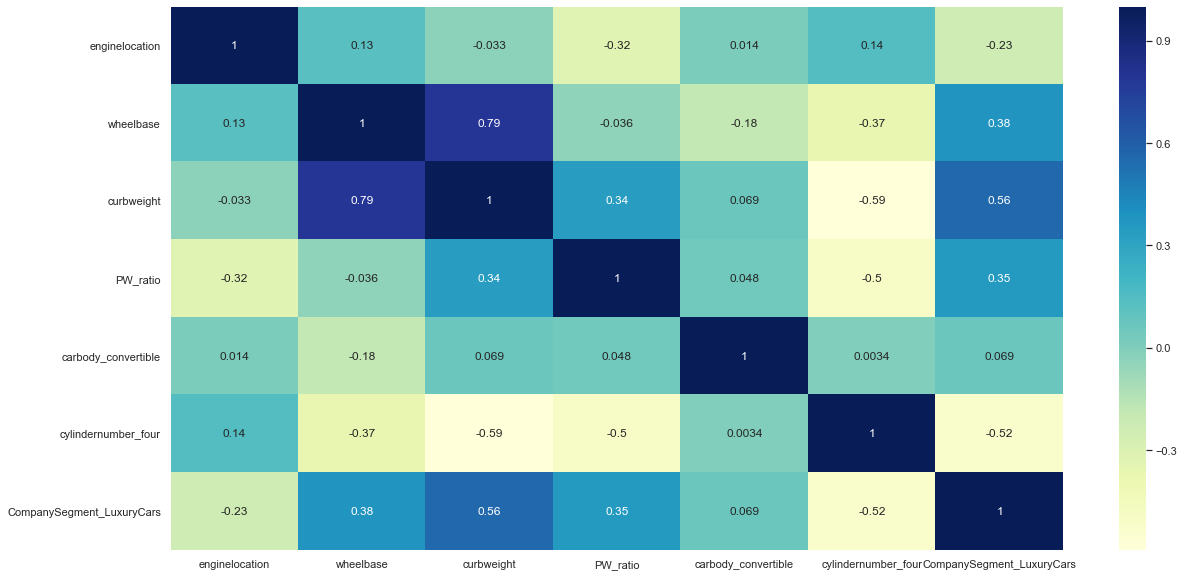

In [67]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_9.corr(),cmap= "YlGnBu" ,annot = True)

- curbweight is having the highest VIF and is strongly corelated with wheelbase. Let's remove this and rebuild our model

#### Model-10

In [68]:
X_train_10 = X_train_9.drop(["curbweight"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_10)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     200.6
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           5.47e-65
Time:                        07:31:43   Log-Likelihood:                 180.50
No. Observations:                 143   AIC:                            -347.0
Df Residuals:                     136   BIC:                            -326.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [69]:
# Calculate the VIFs again for the new model
vif_val_10 = calculateVIF(X_train_10)

# Let's see the vif values
vif_val_10

,Features,VIF
0,enginelocation,26.16
1,wheelbase,7.39
2,PW_ratio,6.77
4,cylindernumber_four,6.30
5,CompanySegment_LuxuryCars,1.78
3,carbody_convertible,1.10


- From the stats model summary of model 10, we see that all the p-values are now in the allowed range. We will look into the VIF table now. From the VIF table above we see that enginelocation has a high vif value. Lets drop it and re-bilud our model.

#### Model-11

In [70]:
X_train_11 = X_train_10.drop(["enginelocation"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_11)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     226.2
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           2.37e-64
Time:                        07:31:43   Log-Likelihood:                 176.04
No. Observations:                 143   AIC:                            -340.1
Df Residuals:                     137   BIC:                            -322.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [71]:
# Calculate the VIFs again for the new model
vif_val_11 = calculateVIF(X_train_11)

# Let's see the vif values
vif_val_11

,Features,VIF
0,wheelbase,3.83
1,PW_ratio,3.46
3,cylindernumber_four,2.77
4,CompanySegment_LuxuryCars,1.75
2,carbody_convertible,1.07


#### Conclusions: 
All the independent variable having singnificantly low VIF and the Adj. R-Squared is 0.888 which is quite a significant fit. We will conclude with these variables as the final model predictor variables.

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
X_train_linear_model.columns

Index(['const', 'wheelbase', 'PW_ratio', 'carbody_convertible',
       'cylindernumber_four', 'CompanySegment_LuxuryCars'],
      dtype='object')

In [73]:
y_train_price = linear_model.predict(X_train_linear_model)

Text(0.5, 0, 'Errors')

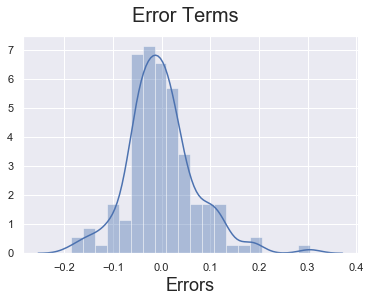

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Model-11.

#### Applying the scaling on the test sets

In [75]:
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','LW_ratio','WH_ratio',
            'PW_ratio','HC_mpg_ratio','stroke','compressionratio','peakrpm','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
y_test = df_test.pop('price')
X_test = df_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_final = X_test[X_train_11.columns]

# Adding a constant variable 
X_test_final = sm.add_constant(X_test_final)

In [78]:
# Making predictions
y_pred = linear_model.predict(X_test_final)

Text(0, 0.5, 'y_pred')

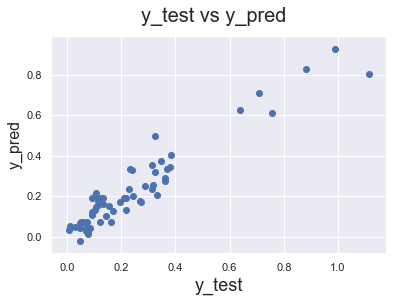

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- y_test VS y_pred is observed pretty good linear spread.

In [80]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model r2_score: 0.8973114984165743



- r2_score on the test data is very close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score. 

Text(0, 0.5, 'ytest-ypred')

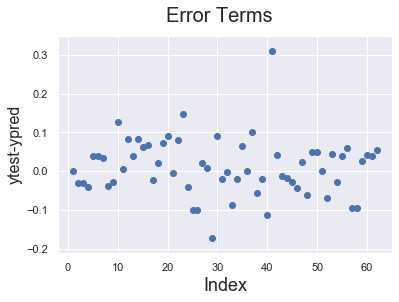

In [81]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

## Conclutions:

1. The R square and Adjusted R square value in our Final Model is almost same which is 89.2% and 88.8% respectively which indicates that none of the parameters in Final model (Model-11) are reduntant.
2. The p-values for all the coefficients are less than the significance level of 0.05. - meaning that all the predictors are statistically significant.
3. And also from Error Terms scatter plot we can see that the error (y_test-y-pred) is unequally distributed, and does not follow any pattern, as there is no curve, and shows no relation which indicates that it is just the white noise.

#### We can see that the equation of our best fitted line is:

##### price=-0.071 +(0.459×wheelbase) + (0.417×PWratio) + (0.224×carbody_convertible) +(0.283×CompanySegment_LuxuryCars)−(0.086×cylindernumber_four) 

This equation implies how the price of the vehical changes with a unit change in any of these independent variable with all other variables held constant.

Overall we have a decent model, but we also acknowledge that we could do better. 
- Adj. R-squared: 0.888 
- r2_score: 0.892 
- Prob (F-statistic): 2.37e-64 
- AIC: -340.1 
- BIC: -322.3.

Suggestions: The chinese company Geely Automotives entering the US market should consider the below listed points,

1. Average US car price: 13200 USD(approx). For being a Competitive brand in this new market and to remain profitable, the model's price predictors variables should be regulated and balanced in effective manner to meet certain price levels and gain an edge over the other.

2. Following car features can be used to make the appropriate changes in design, features and the price offered to the customer. These car features that are very demanding in the US Automobile Market, Geely Automotives can consider these important aspects to being competitive in the market by aquiring these requirements and accrodingly make the necessary changes to their manufacturing line. These are:
    - symboling: In Symboling the Tolerable Symbol (0,1) has the highest number of car percent in the US market.
    - Carbody: Sedan type Carbody is most popular in the US market.
    - fueltype: gas has been widely used as fuel in the US market.
    - aspiration: standard is mostly preferred type.
    - doornumbers: Car with four door options are the choice of more than 56% customers.
    - drivewheel: forward drivewheel type are mostly preferred.
    - engine location: Engine located at front is most popular with nore the 98% share in the market.
    - engine type: ohc type engine is wide used.
    - cylinderNumber: Car with four cylinder options are the choice of more than 77% customers.
    - fuelSystem: mpfi is the popular one.
